In [1]:
import pandas as pd

In [2]:
target = pd.read_csv('data/target_1979-2023.csv')
target.head()

,Tm,Year,W/L%
0,WSB,1979,0.659
1,SEA,1979,0.634
2,PHO,1979,0.610
3,SAS,1979,0.585
4,KCK,1979,0.585


In [3]:
schedule = pd.read_csv('data/features_Schedule.csv')
schedule.head()

,Tm,Year,avgRest,Back2Backs,distTraveledLB,distTraveledUB
0,DEN,1979,0.649089,-0.655340,0.756284,-0.454563
1,DET,1979,0.649089,0.758139,-0.604929,-1.062556
2,IND,1979,0.649089,-0.089949,-1.496024,-0.667459
3,NYK,1979,-2.028403,-0.655340,-0.437059,-0.083346
4,PHI,1979,0.649089,-0.655340,-0.755922,-0.305191


In [5]:
team = pd.read_csv('data/team_yearly_data.csv').drop(columns = ['WinLoss_0', 'NetRating_0', 'SRS_0'])
groupYear = team.groupby('Year')
for feature in ['NetRating_3', 'SRS_3', 'NetRating_2', 'SRS_2', 'NetRating_1', 'SRS_1'] :
    team[feature] = (team[feature] - groupYear[feature].transform('mean')) / groupYear[feature].transform('std')
team.head()

,Tm,Year,WinLoss_3,NetRating_3,SRS_3,WinLoss_2,NetRating_2,SRS_2,WinLoss_1,NetRating_1,SRS_1
0,BOS,1984,0.756,1.327133,1.428002,0.768,1.560378,1.631836,0.683,1.120777,1.170642
1,PHI,1984,0.756,1.776677,1.831590,0.707,1.389480,1.475055,0.793,1.597761,1.650775
2,MIL,1984,0.732,1.619336,1.685259,0.671,1.340651,1.382529,0.622,0.913393,0.947018
3,PHO,1984,0.695,1.237224,1.140062,0.561,0.852370,0.783679,0.646,1.037823,1.010597
4,LAL,1984,0.659,0.877588,0.771876,0.695,1.169753,1.122942,0.707,1.141516,1.109255


In [6]:
players = pd.read_csv('data/player_features.csv').rename(columns = {'Team': 'Tm'})
players.head()

,Tm,Year,MeanPTSWeighted_1,MeanVORP_1,MeanPER_1,MeanWS_1,MeanPTSWeighted_2,MeanVORP_2,MeanPER_2,MeanWS_2,...,MeanPER_3,MeanWS_3,MeanPTSWeighted_4,MeanVORP_4,MeanPER_4,MeanWS_4,MeanPTSWeighted_5,MeanVORP_5,MeanPER_5,MeanWS_5
0,BOS,1984,0.691282,1.306881,0.415070,1.050208,0.931111,1.223837,0.082140,0.793457,...,-0.598941,-0.282896,0.676630,0.123337,-0.740864,-0.222974,0.664872,0.262073,-0.735670,-0.010462
1,NJN,1984,-0.704902,-0.408742,-1.024888,-0.549483,-0.370323,-0.862499,-1.121805,-1.075314,...,-0.796610,-0.892554,-0.102480,0.687010,-0.132179,0.162991,-0.265026,-0.021045,-0.268896,-0.296304
2,NYK,1984,-0.985729,-0.562171,-0.828808,-0.560477,0.295417,-0.436011,-0.828391,-0.473870,...,-0.698426,-0.466333,0.074262,-0.832456,-0.987473,-0.771125,0.353417,-0.811036,-0.911129,-0.972920
3,PHI,1984,0.803246,1.641637,0.669361,1.462499,1.852632,2.952845,1.327730,2.142409,...,-0.027394,0.531779,0.997952,1.440616,0.121027,0.817898,1.003925,1.120561,-0.114197,0.852495
4,WSB,1984,0.400665,2.060082,2.424884,2.451998,-0.118101,0.232539,0.409628,0.518512,...,1.161216,0.864483,-0.006576,0.435808,1.494280,0.719354,-0.195375,-0.390926,0.560182,0.098086


In [7]:
# Merge players - teams
players_teams = players.merge(team, on = ['Tm', 'Year'], how = 'inner')
# Merge players - teams -schedule
players_teams_schedule = players_teams.merge(schedule, on = ['Tm', 'Year'], how = 'inner')
# Final merge
# Merge players - teams -schedule
data = players_teams_schedule.merge(target, on = ['Tm', 'Year'], how = 'inner')

In [8]:
data.columns = ['Tm', 'Year', 'PTS_1', 'VORP_1', 'PER_1',
       'WS_1', 'PTS_2', 'VORP_2', 'PER_2', 'WS_2',
       'PTS_3', 'VORP_3', 'PER_3', 'WS_3',
       'PTS_4', 'VORP_4', 'PER_4', 'WS_4',
       'PTS_5', 'VORP_5', 'PER_5', 'WS_5', 'WinLoss_3',
       'NRtg_3', 'SRS_3', 'WinLoss_2', 'NRtg_2', 'SRS_2',
       'WinLoss_1', 'NRtg_1', 'SRS_1', 'Rest', 'B2B',
       'distLB', 'distUB', 'WinLoss']

In [9]:
data.head()

,Tm,Year,PTS_1,VORP_1,PER_1,WS_1,PTS_2,VORP_2,PER_2,WS_2,...,NRtg_2,SRS_2,WinLoss_1,NRtg_1,SRS_1,Rest,B2B,distLB,distUB,WinLoss
0,BOS,1984,0.691282,1.306881,0.415070,1.050208,0.931111,1.223837,0.082140,0.793457,...,1.560378,1.631836,0.683,1.120777,1.170642,1.244913,-0.368426,-0.359567,0.043129,0.756
1,NJN,1984,-0.704902,-0.408742,-1.024888,-0.549483,-0.370323,-0.862499,-1.121805,-1.075314,...,0.168776,0.223381,0.598,0.581578,0.607197,1.244913,-0.881990,-0.736498,-0.606690,0.549
2,NYK,1984,-0.985729,-0.562171,-0.828808,-0.560477,0.295417,-0.436011,-0.828391,-0.473870,...,-0.661303,-0.552811,0.537,0.519363,0.565542,-0.544649,0.401919,-0.657416,-0.641871,0.573
3,PHI,1984,0.803246,1.641637,0.669361,1.462499,1.852632,2.952845,1.327730,2.142409,...,1.389480,1.475055,0.793,1.597761,1.650775,1.244913,0.401919,-1.004836,-0.809547,0.634
4,WSB,1984,0.400665,2.060082,2.424884,2.451998,-0.118101,0.232539,0.409628,0.518512,...,0.217604,0.272215,0.512,-0.019837,0.043753,-0.544649,0.145138,-1.147874,-0.891759,0.427


In [11]:
data.to_csv('data/final_data.csv', index = None)

In [12]:
data

,Tm,Year,PTS_1,VORP_1,PER_1,WS_1,PTS_2,VORP_2,PER_2,WS_2,...,NRtg_2,SRS_2,WinLoss_1,NRtg_1,SRS_1,Rest,B2B,distLB,distUB,WinLoss
0,BOS,1984,0.691282,1.306881,0.415070,1.050208,0.931111,1.223837,0.082140,0.793457,...,1.560378,1.631836,0.683,1.120777,1.170642,1.244913,-0.368426,-0.359567,0.043129,0.756
1,NJN,1984,-0.704902,-0.408742,-1.024888,-0.549483,-0.370323,-0.862499,-1.121805,-1.075314,...,0.168776,0.223381,0.598,0.581578,0.607197,1.244913,-0.881990,-0.736498,-0.606690,0.549
2,NYK,1984,-0.985729,-0.562171,-0.828808,-0.560477,0.295417,-0.436011,-0.828391,-0.473870,...,-0.661303,-0.552811,0.537,0.519363,0.565542,-0.544649,0.401919,-0.657416,-0.641871,0.573
3,PHI,1984,0.803246,1.641637,0.669361,1.462499,1.852632,2.952845,1.327730,2.142409,...,1.389480,1.475055,0.793,1.597761,1.650775,1.244913,0.401919,-1.004836,-0.809547,0.634
4,WSB,1984,0.400665,2.060082,2.424884,2.451998,-0.118101,0.232539,0.409628,0.518512,...,0.217604,0.272215,0.512,-0.019837,0.043753,-0.544649,0.145138,-1.147874,-0.891759,0.427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1126,MEM,2023,0.029700,0.788586,1.130905,0.968684,-1.070200,-0.527428,0.347908,-0.031597,...,0.204566,0.225057,0.683,1.172994,1.149034,0.038747,-1.149863,0.795401,-0.581626,0.622
1127,OKC,2023,-1.345019,-1.285102,-0.719667,-1.695773,-0.637248,-1.811068,1.053207,-2.128521,...,-2.144903,-2.131412,0.293,-1.665226,-1.690033,-0.007749,-0.308500,0.690877,-0.610994,0.488
1128,BRK,2023,0.362323,-0.175241,-1.045230,-0.549918,0.205909,0.337065,-0.760419,0.198202,...,0.913457,0.892021,0.537,0.165220,0.175579,-0.193734,0.532864,-1.076320,-0.404584,0.549
1129,NOP,2023,0.015879,-0.175241,0.137079,-0.190976,0.612445,0.468048,0.395323,0.471090,...,-0.058737,-0.042150,0.439,-0.204983,-0.179572,0.038747,-1.149863,-0.013805,0.039575,0.512


In [114]:
import matplotlib.pyplot as plt

In [126]:
features = ['PTS_1', 'VORP_1', 'PER_1',
       'WS_1', 'PTS_2', 'VORP_2', 'PER_2', 'WS_2',
       'PTS_3', 'VORP_3', 'PER_3', 'WS_3',
       'PTS_4', 'VORP_4', 'PER_4', 'WS_4',
       'PTS_5', 'VORP_5', 'PER_5', 'WS_5', 'WinLoss_3',
       'NRtg_3', 'SRS_3', 'WinLoss_2', 'NRtg_2', 'SRS_2',
       'WinLoss_1', 'NRtg_1', 'SRS_1', 'Rest', 'B2B',
       'distLB', 'distUB']
features = ['PTS_1', 'VORP_1', 'WS_1', 'WinLoss_1']

In [127]:
data_lm = data.dropna()
train = data_lm[(data_lm['Year'] < 2023) & (data_lm['Year'] >= 2020)]
test = data_lm[data_lm['Year'] == 2023]
X_train, y_train = train[features], train['WinLoss']
X_test, y_test = test[features], test['WinLoss']

In [128]:
from sklearn.linear_model import LinearRegression

In [129]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [130]:
y_pred = model.predict(X_test)

In [131]:
np.abs(y_pred - y_test).mean()

0.07161121070062283

In [132]:
from sklearn.metrics import r2_score as r2

In [133]:
r2(y_test, y_pred)

0.47691697104003505

In [134]:
test['pred'] = y_pred

/var/folders/x8/gymrgfns32bd6rd_ksf19p3m0000gn/T/ipykernel_9193/3359158094.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pred'] = y_pred


In [135]:
test.sort_values('WinLoss', ascending = False)

,Tm,Year,PTS_1,VORP_1,PER_1,WS_1,PTS_2,VORP_2,PER_2,WS_2,...,SRS_2,WinLoss_1,NRtg_1,SRS_1,Rest,B2B,distLB,distUB,WinLoss,pred
1072,MIL,2023,0.768064,0.816252,-0.007875,0.487372,0.473295,0.659723,-0.615183,0.641659,...,1.171852,0.622,0.699957,0.689050,-2.425550,-0.308500,-0.304014,-0.936770,0.707,0.557505
1062,BOS,2023,1.640588,2.504945,2.140561,2.625020,1.128474,0.090935,-0.784812,-0.629966,...,0.277656,0.622,1.502062,1.502046,2.038082,-0.308500,0.041210,0.325711,0.695,0.582420
1070,DEN,2023,0.433119,1.882795,2.191311,1.739021,1.020962,2.159255,1.192245,2.407806,...,1.014053,0.585,0.473722,0.462267,-0.100742,-1.149863,1.716844,-0.222995,0.646,0.510413
1086,MEM,2023,0.067640,0.845879,1.134010,1.035847,-1.045594,-0.503707,0.326551,-0.022412,...,0.225057,0.683,1.172994,1.149034,0.038747,-1.149863,0.795401,-0.581626,0.622,0.571579
1065,CLE,2023,1.055821,0.253355,-0.295461,0.206103,-0.357223,-1.305181,-1.767492,-1.308166,...,-1.723238,0.537,0.432589,0.436593,-0.193734,-1.149863,-1.581682,-1.073156,0.622,0.556347
1080,SAC,2023,0.857815,-0.605804,-0.084001,-0.426754,0.707803,0.323621,0.273908,0.373205,...,-0.725947,0.366,-1.130489,-1.125215,-0.193734,1.374227,1.363500,1.850107,0.585,0.497499
1063,NYK,2023,-0.247875,-0.428047,-1.005967,-0.328309,0.154365,-0.090043,-0.615183,-0.206091,...,0.448080,0.451,-0.019881,-0.001997,-0.193734,-1.149863,-0.381450,-0.391102,0.573,0.475696
1088,BRK,2023,0.401660,-0.131785,-1.014426,-0.511134,0.209203,0.349475,-0.767264,0.203655,...,0.892021,0.537,0.165220,0.175579,-0.193734,0.532864,-1.076320,-0.404584,0.549,0.519636
1075,PHO,2023,0.493261,1.201393,0.085167,1.443688,-0.239609,0.194351,-0.720470,0.726434,...,1.192892,0.780,1.543196,1.484930,-0.193734,-1.149863,1.078007,0.651928,0.549,0.629956
1081,MIA,2023,0.437745,1.112514,1.404679,1.359307,1.059926,1.435343,1.566599,1.630701,...,-0.012694,0.646,0.905625,0.905136,-0.193734,0.532864,0.457546,0.876870,0.537,0.569543


In [136]:
r2(test['WinLoss'], test['WinLoss_1'])

0.01900299690295193

In [153]:
z = np.array(data[features + ['WinLoss']].corr())

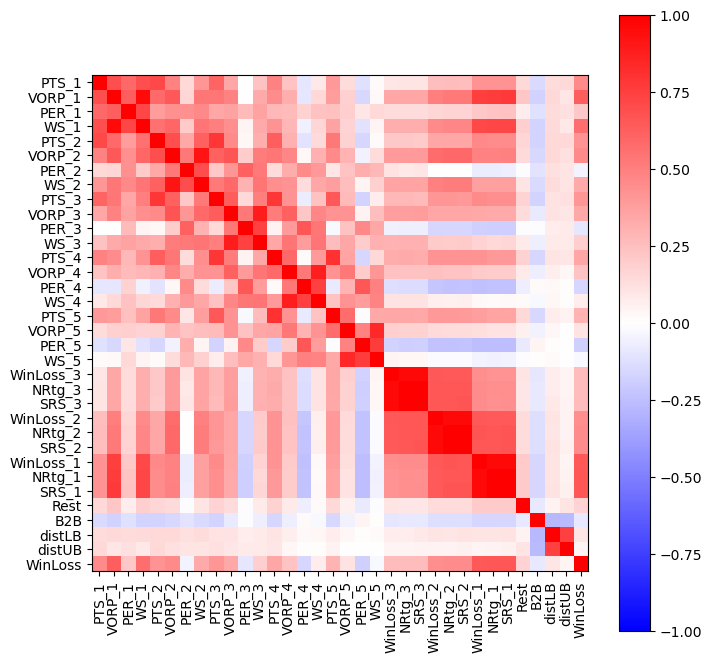

In [154]:
plt.figure(figsize = (8, 8))
plt.imshow(z, cmap = 'bwr', vmin = -1, vmax = 1)
features = ['PTS_1', 'VORP_1', 'PER_1',
       'WS_1', 'PTS_2', 'VORP_2', 'PER_2', 'WS_2',
       'PTS_3', 'VORP_3', 'PER_3', 'WS_3',
       'PTS_4', 'VORP_4', 'PER_4', 'WS_4',
       'PTS_5', 'VORP_5', 'PER_5', 'WS_5', 'WinLoss_3',
       'NRtg_3', 'SRS_3', 'WinLoss_2', 'NRtg_2', 'SRS_2',
       'WinLoss_1', 'NRtg_1', 'SRS_1', 'Rest', 'B2B',
       'distLB', 'distUB']
plt.colorbar()
plt.xticks(range(len(features)+1), features + ['WinLoss'], rotation = 90)
plt.yticks(range(len(features)+1), features + ['WinLoss'])
plt.show()

In [160]:
r2(test['WinLoss'], test['WinLoss_1'])

0.01900299690295193